In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Функция
def custom_function(x):
    return x**3 - 3*x**2 + 1

In [ ]:
# Производная функции
def gradient_custom(x):
    ...

In [ ]:
# Градиентный спуск
def gradient_descent_custom(learning_rate, num_iterations, start_position):
    trajectory = [start_position]
    
    for _ in range(num_iterations):
        current_x = trajectory[-1]
        new_x = ...
        trajectory.append(new_x)

    return np.array(trajectory)

In [ ]:
# Параметры, их можно менять
learning_rate_custom = 0.1
num_iterations_custom = 20
start_position_custom = 10

In [ ]:
# Запуск градиентного спуска
trajectory_custom = gradient_descent_custom(...)

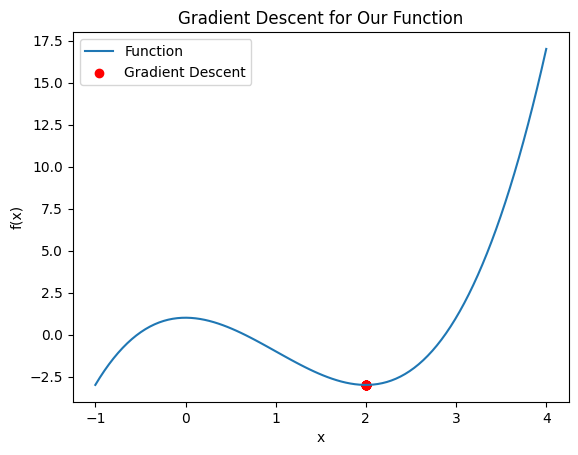

In [ ]:
# Визуализация
x_vals_custom = np.linspace(-1, 4, 100)
y_vals_custom = custom_function(x_vals_custom)

plt.plot(x_vals_custom, y_vals_custom, label='Function')
plt.scatter(trajectory_custom, custom_function(trajectory_custom), color='red', label='Gradient Descent')
plt.title('Gradient Descent for Our Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

Для двух переменных


In [ ]:
# Функция
def quadratic_function_2d(x, y):
    return x**2 + y**2 + 2*x + 2*y + 1

In [ ]:
# Частные производные функции
def partial_derivative_x(x, y):
    ...

def partial_derivative_y(x, y):
    ...

In [ ]:
# Градиентный спуск для функции двух переменных
def gradient_descent_2d(learning_rate, num_iterations, start_position):
    x_trajectory, y_trajectory = [start_position[0]], [start_position[1]]

    for _ in range(num_iterations):
        current_x, current_y = x_trajectory[-1], y_trajectory[-1]
        new_x = ...
        new_y = ...
        x_trajectory.append(new_x)
        y_trajectory.append(new_y)

    return ...

In [ ]:
# Параметры
learning_rate_2d = 0.1
num_iterations_2d = 20
start_position_2d = np.array([-5, -5])

In [ ]:
# Запуск градиентного спуска
x_trajectory_2d, y_trajectory_2d = gradient_descent_2d(...)

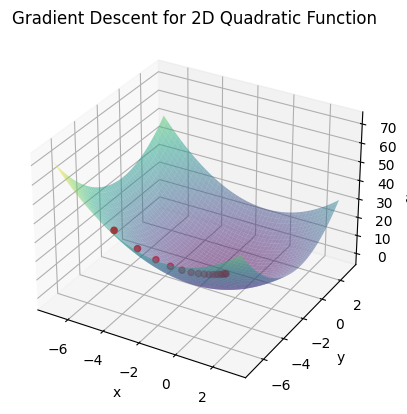

In [ ]:
# Визуализация
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_vals = np.linspace(-7, 3, 100)
y_vals = np.linspace(-7, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = quadratic_function_2d(X, Y)

ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')
ax.scatter(x_trajectory_2d, y_trajectory_2d, quadratic_function_2d(x_trajectory_2d, y_trajectory_2d), color='red')
ax.set_title('Gradient Descent for 2D Quadratic Function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

...

Градиентный спуск для выпуклой функции:

In [ ]:
# Функция
def convex_function(x):
    return x**2 + 2*x + 1

In [ ]:
# Производная функции
def gradient_convex(x):
    ...

In [ ]:
# Градиентный спуск
def gradient_descent_convex(learning_rate, num_iterations, start_position):
    trajectory = [start_position]

    for _ in range(...):
        current_x = trajectory[-1]
        new_position = ...
        trajectory.append(...)

    return ...

In [ ]:
# Параметры
learning_rate_convex = 0.1
num_iterations_convex = 20
start_position_convex = -5

In [ ]:
# Запуск градиентного спуска
trajectory_convex = gradient_descent_convex(...)

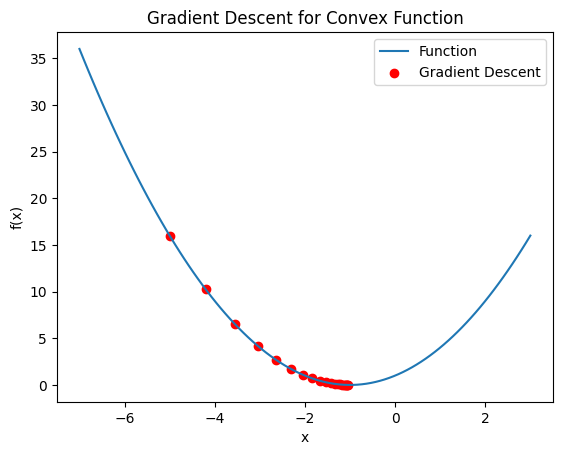

In [ ]:
# Визуализация
x_vals_convex = np.linspace(-7, 3, 100)
y_vals_convex = convex_function(x_vals_convex)

...

Линейная регрессия

In [ ]:
# импортируем линейную регрессию из библиотеки sklearn

In [ ]:
# Создаем простой набор данных
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Формула явного вычисления весов линейной регресии

$$ \boldsymbol{w} = (X^{T}X)^{-1}X^{T}\boldsymbol{y}$$

In [ ]:
# Реализация линейной регрессии
class CustomLinearRegression:
    def __init__(self):
        #  коэффициенты модели
        self.coef_ = None
        #  bias, или w_0, то есть свободный член в уравнении модели
        self.intercept_ = None

    def fit(self, X, y):
        # добавляем столбец из единиц (для w_0, то есть bias)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # считаем веса по формуле из лекции
        # нужно умножить матрицы в правильном порядке, взять обратную
        # транспонировать матрицу X - X.T
        # умножить матрицу A на B - A.dot(B) или A @ B
        # взять обратную - np.linalg.inv(A) 
        W = ...
        # выставляем веса
        self.intercept_ = W[0]
        self.coef_ = W[1:]

    def predict(self, X):

        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        # добавляем bias и коээффициенты в один вектор 
        w = np.concatenate([[self.intercept_], self.coef_])
        # делаем предикт
        predicts =  ...
        return predicts

In [ ]:
# Обучение модели
custom_lr = CustomLinearRegression()
custom_lr.fit(...)

# Предсказание
y_pred_custom = custom_lr.predict()

In [ ]:
# Сравнение с реализацией из scikit-learn
lr_sklearn = ...
lr_sklearn.fit(...)
y_pred_sklearn = ...

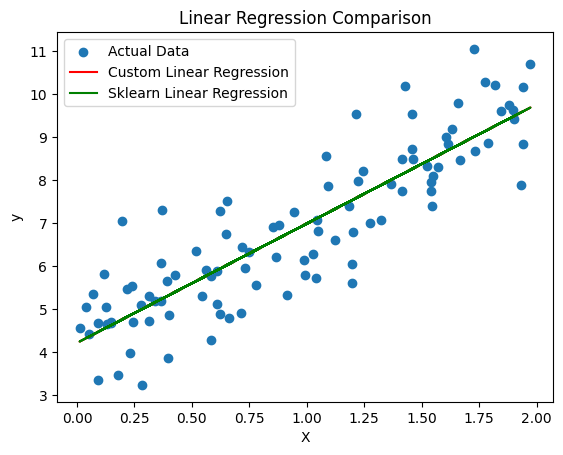

In [ ]:
# Визуализация
plt.scatter(X, y, label='Actual Data')
plt.plot(X, ..., color='red', label='Custom Linear Regression')
plt.plot(X, ..., color='green', label='Sklearn Linear Regression')
plt.title('Linear Regression Comparison')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()